In [28]:
import pandas as pd
import numpy as np

In [29]:
data = pd.read_csv("faang_stock_prices.csv")
data

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14959,2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
14960,2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
14961,2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010
14962,2026-01-22,MSFT,447.619995,452.839996,444.700012,451.140015,25349400,456.619999,473.541905,462.516201,471.646111,28.776809,-9.129910,-6.416445,500.741510,445.204489,0.015829,0.014832,465.950012


In [30]:
# finding out if the date column is in the datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             14964 non-null  object 
 1   Ticker           14964 non-null  object 
 2   Open             14964 non-null  float64
 3   High             14964 non-null  float64
 4   Low              14964 non-null  float64
 5   Close            14964 non-null  float64
 6   Volume           14964 non-null  int64  
 7   SMA_7            14964 non-null  float64
 8   SMA_21           14964 non-null  float64
 9   EMA_12           14964 non-null  float64
 10  EMA_26           14964 non-null  float64
 11  RSI_14           14964 non-null  float64
 12  MACD             14964 non-null  float64
 13  MACD_Signal      14964 non-null  float64
 14  Bollinger_Upper  14964 non-null  float64
 15  Bollinger_Lower  14964 non-null  float64
 16  Daily_Return     14964 non-null  float64
 17  Volatility_7

In [31]:

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort values (VERY IMPORTANT for time series)
data = data.sort_values(by=['Ticker', 'Date'])

# Set datetime index
data.set_index('Date', inplace=True)

data.head()

,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,
2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
2016-02-24,AAPL,21.304558,21.848618,21.154940,21.785145,145022800,21.850879,21.652174,21.730120,21.824170,50.813846,-0.094050,-0.138761,22.239524,20.975578,0.014891,0.018822,21.934757
2016-02-25,AAPL,21.773806,21.934757,21.592451,21.934757,110330800,21.854765,21.623132,21.761602,21.832361,50.485507,-0.070759,-0.125160,22.244062,21.058185,0.006868,0.015572,21.968756
2016-02-26,AAPL,22.034495,22.220383,21.893947,21.968756,115964400,21.815580,21.666249,21.793472,21.842465,60.284646,-0.048992,-0.109927,22.260391,21.117294,0.001550,0.014163,21.918888
2016-02-29,AAPL,21.957425,22.267995,21.909820,21.918888,140865200,21.829505,21.699797,21.812767,21.848126,56.325411,-0.035359,-0.095013,22.256425,21.118435,-0.002270,0.012012,22.789389


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14964 entries, 0 to 14963
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             14964 non-null  datetime64[ns]
 1   Ticker           14964 non-null  object        
 2   Open             14964 non-null  float64       
 3   High             14964 non-null  float64       
 4   Low              14964 non-null  float64       
 5   Close            14964 non-null  float64       
 6   Volume           14964 non-null  int64         
 7   SMA_7            14964 non-null  float64       
 8   SMA_21           14964 non-null  float64       
 9   EMA_12           14964 non-null  float64       
 10  EMA_26           14964 non-null  float64       
 11  RSI_14           14964 non-null  float64       
 12  MACD             14964 non-null  float64       
 13  MACD_Signal      14964 non-null  float64       
 14  Bollinger_Upper  14964 non-null  float

# Work per Ticker

In [32]:
# Work per Ticker
# We preprocess each step separately
tickers = data['Ticker'].unique()

# Example: work with AAPL first
data_aapl = data[data['Ticker'] == 'AAPL'].copy()

data_aapl.head()

,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,
2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
2016-02-24,AAPL,21.304558,21.848618,21.154940,21.785145,145022800,21.850879,21.652174,21.730120,21.824170,50.813846,-0.094050,-0.138761,22.239524,20.975578,0.014891,0.018822,21.934757
2016-02-25,AAPL,21.773806,21.934757,21.592451,21.934757,110330800,21.854765,21.623132,21.761602,21.832361,50.485507,-0.070759,-0.125160,22.244062,21.058185,0.006868,0.015572,21.968756
2016-02-26,AAPL,22.034495,22.220383,21.893947,21.968756,115964400,21.815580,21.666249,21.793472,21.842465,60.284646,-0.048992,-0.109927,22.260391,21.117294,0.001550,0.014163,21.918888
2016-02-29,AAPL,21.957425,22.267995,21.909820,21.918888,140865200,21.829505,21.699797,21.812767,21.848126,56.325411,-0.035359,-0.095013,22.256425,21.118435,-0.002270,0.012012,22.789389


In [33]:
# Check missing values
data_aapl.isnull().sum()

# Forward fill
data_aapl.fillna(method='ffill', inplace=True)

# Backward fill if needed
data_aapl.fillna(method='bfill', inplace=True)

/var/folders/j7/lpxk5gh952q3m3psjp7rc2cm0000gn/T/ipykernel_28722/1481779907.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_aapl.fillna(method='ffill', inplace=True)
/var/folders/j7/lpxk5gh952q3m3psjp7rc2cm0000gn/T/ipykernel_28722/1481779907.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_aapl.fillna(method='bfill', inplace=True)


In [7]:
data

,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,,
2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-22,AMZN,234.050003,235.720001,230.899994,234.339996,31913300,236.171426,236.013333,236.263937,235.039321,53.529872,1.224615,2.202436,248.520707,224.264292,0.013099,0.017721,239.160004
2026-01-22,GOOGL,334.450012,335.149994,328.750000,330.540009,26253600,330.787144,321.977620,326.886086,320.764595,67.582193,6.121491,6.383337,339.589684,305.585319,0.006578,0.014879,327.929993
2026-01-22,META,629.349976,660.570007,626.549988,647.630005,21394700,621.767151,645.427618,632.259363,640.510804,45.687381,-8.251442,-5.985550,684.649099,604.598899,0.056562,0.028988,658.760010


In [8]:
data.isnull().sum()

Ticker             0
Open               0
High               0
Low                0
Close              0
Volume             0
SMA_7              0
SMA_21             0
EMA_12             0
EMA_26             0
RSI_14             0
MACD               0
MACD_Signal        0
Bollinger_Upper    0
Bollinger_Lower    0
Daily_Return       0
Volatility_7d      0
Next_Day_Close     0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
cont_data = data.select_dtypes(exclude='object')

In [10]:
def detect_outliers(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = len(outliers)

    return outlier_summary

detect_outliers(cont_data, cont_data.columns)

{'Open': 937,
 'High': 931,
 'Low': 941,
 'Close': 937,
 'Volume': 2243,
 'SMA_7': 942,
 'SMA_21': 944,
 'EMA_12': 950,
 'EMA_26': 948,
 'RSI_14': 5,
 'MACD': 1987,
 'MACD_Signal': 1972,
 'Bollinger_Upper': 903,
 'Bollinger_Lower': 941,
 'Daily_Return': 949,
 'Volatility_7d': 750,
 'Next_Day_Close': 936}

In [49]:
def remove_outliers(column):
    for column in column:
        Q1=data[column].quantile(.25)
        Q3=data[column].quantile(.75)

        IQR =Q3 - Q1

        upper_boundary=Q3 + 1.5 * IQR
        lower_boundary=Q1 - 1.5 * IQR

        data[column]=np.where(data[column]>upper_boundary,upper_boundary,data[column])
        data[column]=np.where(data[column]<lower_boundary,lower_boundary,data[column])

remove_outliers(cont_data.columns)

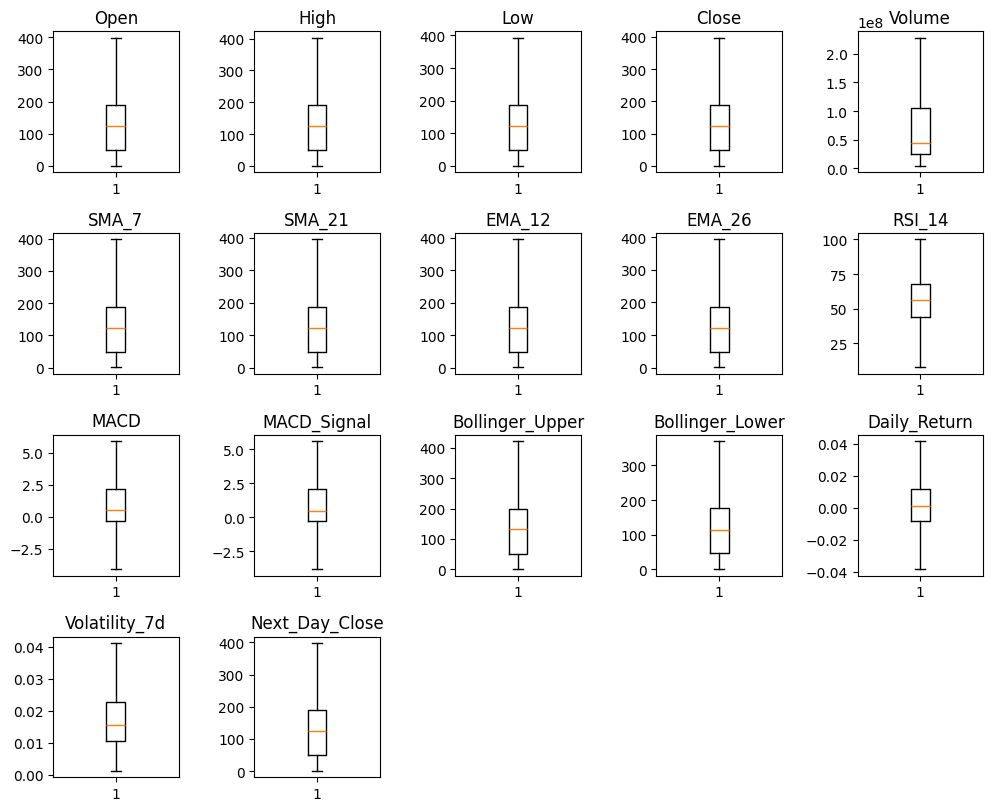

In [50]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data):
    plt.subplot(5,5,i+1)
    plt.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [51]:
def detect_outliers(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = len(outliers)

    return outlier_summary

detect_outliers(cont_data, cont_data.columns)

{'Open': 0,
 'High': 0,
 'Low': 0,
 'Close': 0,
 'Volume': 0,
 'SMA_7': 0,
 'SMA_21': 0,
 'EMA_12': 0,
 'EMA_26': 0,
 'RSI_14': 0,
 'MACD': 0,
 'MACD_Signal': 0,
 'Bollinger_Upper': 0,
 'Bollinger_Lower': 0,
 'Daily_Return': 0,
 'Volatility_7d': 0,
 'Next_Day_Close': 0}

# Resampling

In [52]:
data_weekly = cont_data.resample('W').mean()

In [53]:
data_weekly

,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
Date,,,,,,,,,,,,,,,,,
2016-02-28,39.635845,40.016704,39.007090,39.650855,9.177616e+07,39.291495,39.249833,39.146358,39.013817,53.831189,0.132541,0.032079,42.592193,35.944905,-0.001055,0.019908,39.717986
2016-03-06,40.399992,40.790830,40.003362,40.454457,9.353847e+07,39.973119,39.237238,39.709768,39.357488,73.229171,0.352281,0.190325,41.736684,36.547220,0.004958,0.016939,40.469238
2016-03-13,40.049726,40.411731,39.505397,40.053912,9.063386e+07,40.231628,39.375878,39.949727,39.611066,60.017206,0.338660,0.307080,41.561745,37.366396,0.000828,0.015944,40.338954
2016-03-20,41.211169,41.669560,40.913288,41.360032,9.320059e+07,40.664158,40.087036,40.549280,40.042932,65.826412,0.506349,0.395441,41.805248,38.502338,0.003161,0.011771,41.459526
2016-03-27,41.418788,41.879743,41.260160,41.694292,8.437222e+07,41.464595,40.595039,41.087690,40.486592,60.901517,0.601098,0.513718,42.365176,38.915794,0.004139,0.010747,41.788383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-28,299.600441,302.430993,296.893669,300.015664,3.582987e+07,296.799080,298.048604,297.200174,296.030301,48.031990,0.606952,0.204809,313.467616,283.590281,0.004370,0.013833,300.742418
2026-01-04,300.502526,303.584742,297.388251,299.953998,3.772212e+07,299.636045,298.085408,298.294528,296.781442,47.970550,1.193278,0.739638,313.271921,283.589121,-0.003670,0.008582,299.957001
2026-01-11,301.190524,304.933492,297.577503,301.152164,5.330230e+07,300.166509,297.891543,298.965071,297.400903,56.541434,0.742572,0.800269,314.166780,282.350871,0.002824,0.010797,301.882750


# Feature scaling

In [45]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(data_weekly.values.reshape(-1,1))

# Stationarity

In [56]:

from statsmodels.tsa.stattools import adfuller

result = adfuller(data_weekly['Close'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: 0.44460941718433
p-value: 0.9830886718239084
Critical Values: {'1%': np.float64(-3.443086684769254), '5%': np.float64(-2.867157550015396), '10%': np.float64(-2.5697619453458325)}
